# Section 29: Decision Trees

- online-ds-pt-100719
- 04/08/20


## ANNOUNCEMENTS

I apologize for how much study group times are shifting this week and next; this is only temporary to accomodate launch week of my new cohort. 
So here is the plan for our remaining Mod 3 study groups:
> #### 1. Tonight (04/09/20) at 7 PM EST, we will cover decision trees (sect 29). https://learn.co/study-groups/section-29-decision-trees-1
> #### 2. Tomorrow (Friday 04/10/20) at 7 PM EST we introduce the project early (so you can start hunting for datasets).https://learn.co/study-groups/intro-to-mod-3-project-how-to-pick-a-dataset
> #### 3. Saturday (04/11/20) at 3 PM EST we will cover Sect 30 (Ensemble Methods)https://learn.co/study-groups/section-30-ensemble-methods

> ### For next week:
> We have to shift our Tuesday study group to Wednesday (for just next week) to accommodate  the new cohort's orientation.
> #### 1. Wednesday (04/15/20) we will cover Sect 31: Support Vector Machines at 7 PM. https://learn.co/study-groups/sect-31-support-vector-machines 
> #### 2. Thursday (04/16)) we will have Mod 3 Project Office Hours at the usual time (7 PM EST) https://learn.co/study-groups/mod-3-project-office-hours-28

## Questions/Comments?:

- 

## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

# Introduction to Decision Trees

## Activity: Data Partitioning

In [3]:
!pip install -U fsds_100719
from fsds_100719.imports import *

//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



[i] Pandas .iplot() method activated.


In [4]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use('seaborn-talk')

//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [5]:
def helper_create_plot(n=300):
    '''
    Create a plot to practice how a decision tree makes its cuts/decisions.
    '''
    X = []
    y = []

    for i in range(n):
        # Generate a random number
        nx = np.random.random()*10
        ny = np.random.random()*10
        X.append((nx,ny))

        if nx > 5:
            if ny > 1:
                y.append(0)
            else:
                y.append(1)
        else:
            if ny > 7:
                y.append(0)
            else:
                y.append(1)

    X = np.array(X)

    f, ax = plt.subplots(1)

    ax.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Set1');
    plt.xticks(range(11));
    plt.xlabel('X1');
    plt.yticks(range(11));
    plt.ylabel('X2');
    
    return f, ax

def create_line(ax, direction, threshold, x_range=(0,10), y_range=(0,10), color='blue'):
    '''
    Creates a vertical or horizontal cut at threshold
    '''
    if direction == 'vertical':
        cut = lambda t: ax.vlines(t,y_range[0], y_range[1], colors=color)
    elif direction == 'horizontal':
        cut = lambda t: ax.hlines(t,x_range[0], x_range[1], colors=color)
    else:
        print('Direction does not exist')
        return
    
    cut(threshold)
    

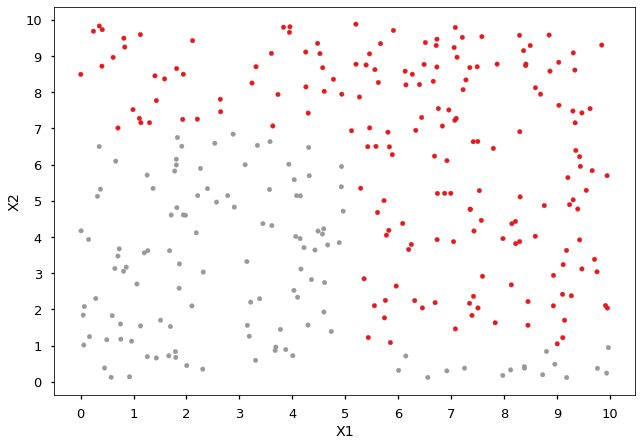

In [6]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [7]:
# 'horizontal' or 'vertical'
q1_direction = None
# Between 0 and 10
q1_threshold = None

Direction does not exist


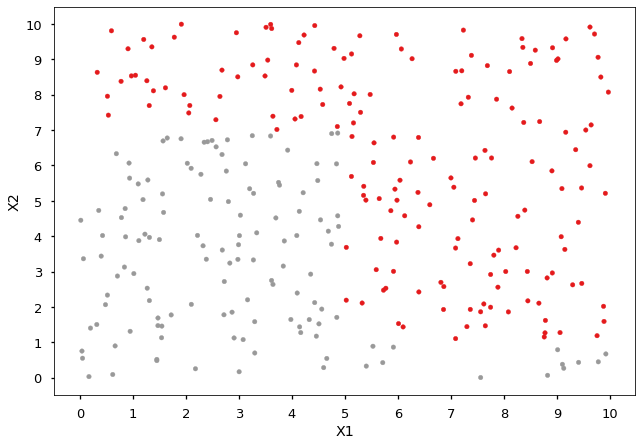

In [8]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

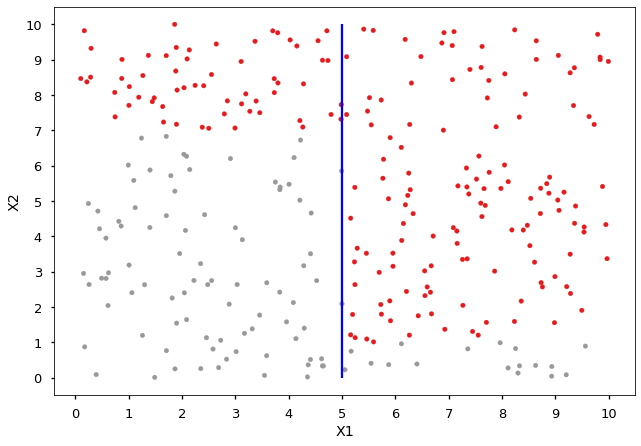

In [9]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [10]:
# 'horizontal' or 'vertical'
q2_direction = None
# Between 0 and 10
q2_threshold = None


Direction does not exist


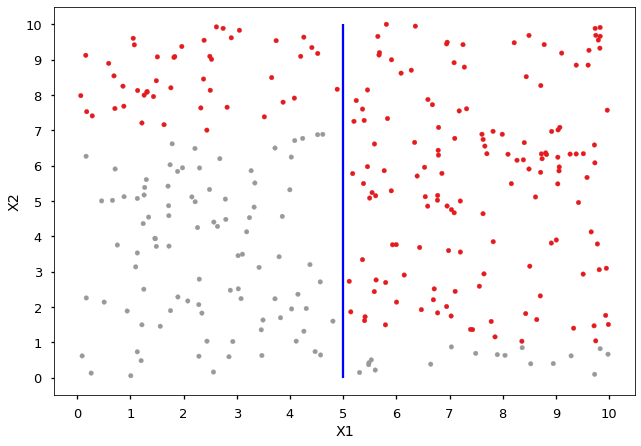

In [11]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

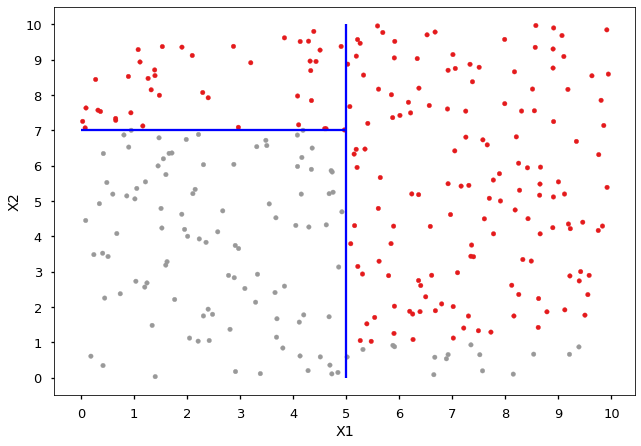

In [12]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [13]:
# 'horizontal' or 'vertical'
q3_direction = None
# Between 0 and 10
q3_threshold = None

Direction does not exist


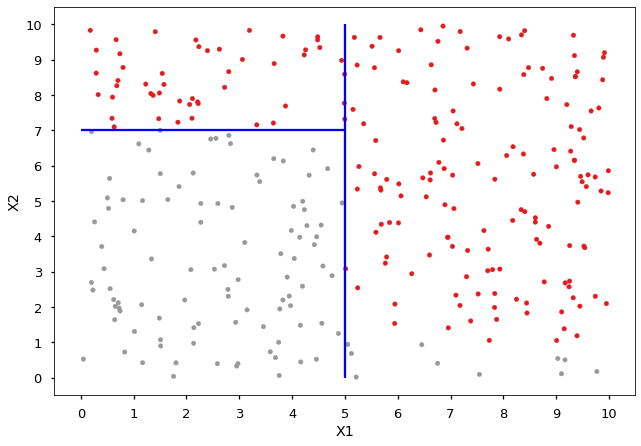

In [14]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

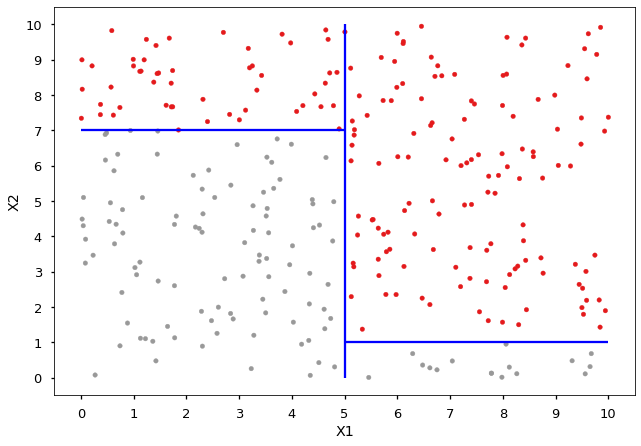

In [15]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=70%>




## Decision Trees Overview

- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>


## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 





## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration. 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'Information Gain'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Implementation with sklearn

In [16]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1


In [17]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

,outlook,temp,humidity,windy
0,sunny,hot,high,0
1,sunny,hot,high,1
2,overcast,hot,high,0
3,rainy,mild,high,0
4,rainy,cool,normal,0
5,rainy,cool,normal,1
6,overcast,cool,normal,1
7,sunny,mild,high,0
8,sunny,cool,normal,0
9,rainy,mild,normal,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train)

def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = encoder.transform(X_train).toarray()
X_test_ohe = encoder.transform(X_test).toarray()


X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

X_test_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



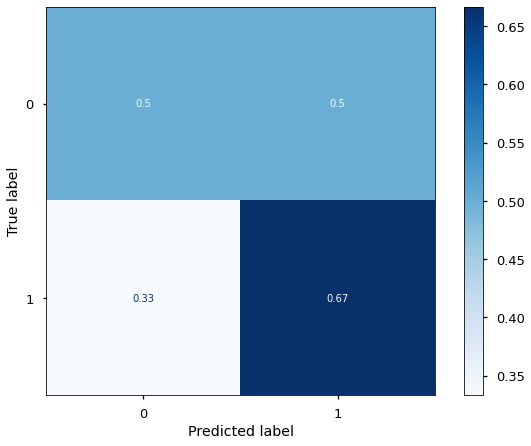

In [21]:
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe,y_train)
y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

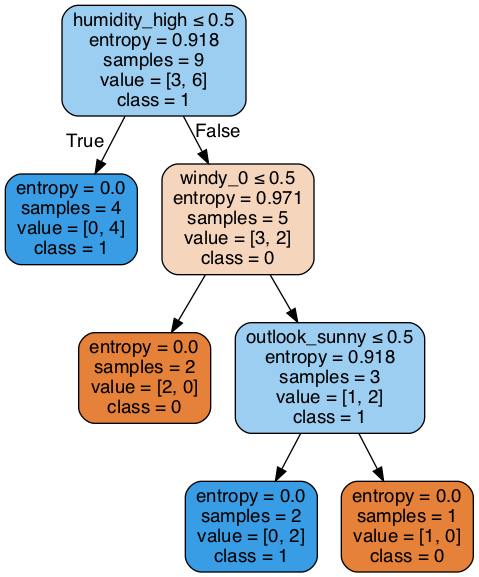

In [22]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [23]:
metrics.accuracy_score(y_test,y_hat_test)

0.6

# Activity: Iowa Prisoners

In [24]:
# df2 = fs.datasets.load_iowa_prisoners(vers='raw')
# df2.head()

In [25]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"

df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [26]:
df= df.drop(columns=['yr_released'])

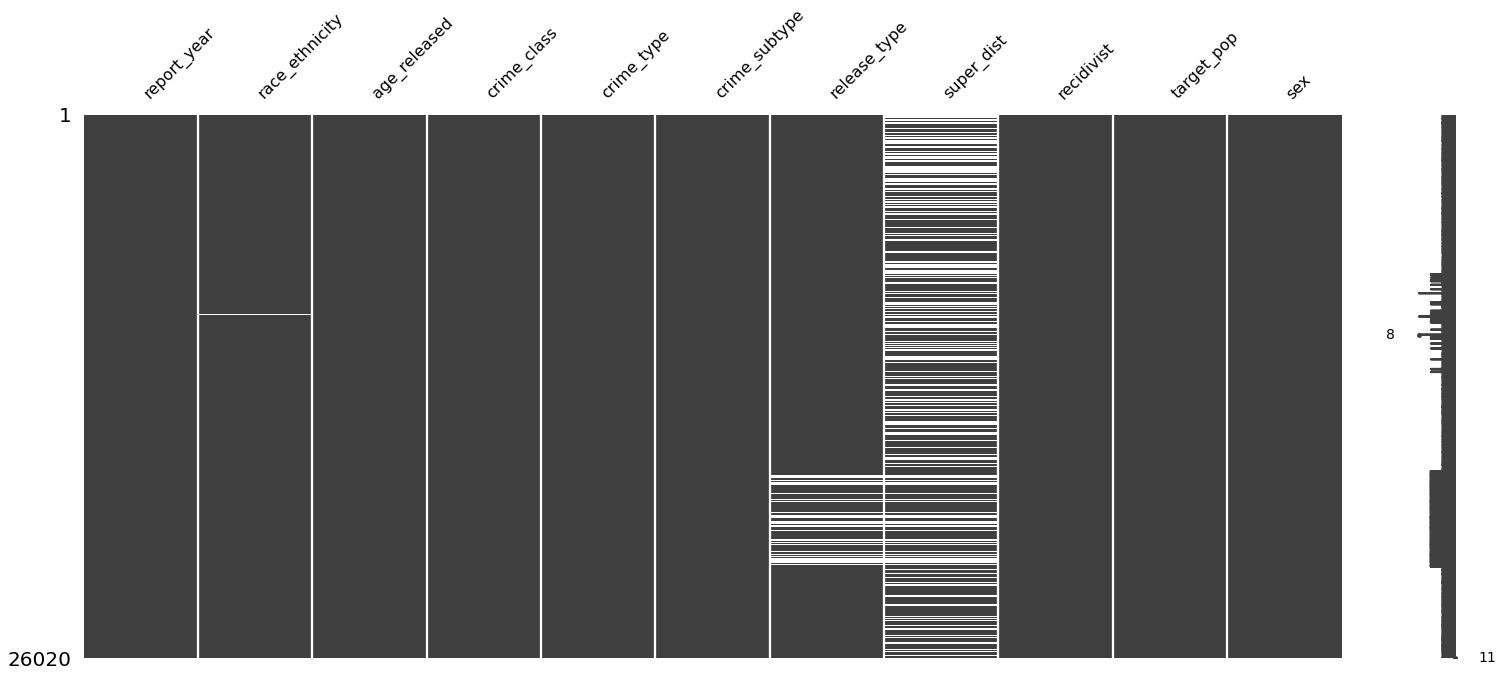

In [27]:
import missingno
missingno.matrix(df)

In [28]:
df.isna().sum().divide(len(df))*100

report_year        0.000000
race_ethnicity     0.115296
age_released       0.011530
crime_class        0.000000
crime_type         0.000000
crime_subtype      0.000000
release_type       6.771714
super_dist        36.821676
recidivist         0.000000
target_pop         0.000000
sex                0.011530
dtype: float64

In [29]:
df['race_ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [30]:
df['super_dist'].value_counts(dropna=False)

NaN                   9581
5JD                   4982
1JD                   2787
2JD                   1988
8JD                   1556
7JD                   1514
3JD                   1188
6JD                   1098
4JD                    667
ISC                    350
Interstate Compact     309
Name: super_dist, dtype: int64

In [31]:
## Check for and address null values
drop_cols = ['race_ethnicity','age_released','sex']
df = df.dropna(subset=drop_cols)
df.isna().sum()

report_year          0
race_ethnicity       0
age_released         0
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9549
recidivist           0
target_pop           0
sex                  0
dtype: int64

In [32]:
df =  df.fillna('missing')
df.isna().sum()

report_year       0
race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
dtype: int64

In [33]:
## Inspect Value Counts for target
df['recidivist'].value_counts(normalize=True)

No     0.665948
Yes    0.334052
Name: recidivist, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 11 columns):
report_year       25987 non-null int64
race_ethnicity    25987 non-null object
age_released      25987 non-null object
crime_class       25987 non-null object
crime_type        25987 non-null object
crime_subtype     25987 non-null object
release_type      25987 non-null object
super_dist        25987 non-null object
recidivist        25987 non-null object
target_pop        25987 non-null object
sex               25987 non-null object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [35]:
df['age_released'].value_counts()

25-34           9543
35-44           6217
Under 25        4585
45-54           4340
55 and Older    1302
Name: age_released, dtype: int64

In [36]:
age_map = {'25-34':30, '35-44':40,
           'Under 25': 20,
           '45-54':50,
           '55 and Older': 61}

df['age_released'] = df['age_released'].map(age_map)
df['age_released']

0        30
1        30
2        40
3        30
4        40
         ..
26015    20
26016    40
26017    30
26018    30
26019    40
Name: age_released, Length: 25987, dtype: int64

In [37]:
## Encode categorical features
df = pd.get_dummies(df, drop_first=True,
                    columns=df.drop(columns='age_released').columns)
df

,age_released,report_year_2014,report_year_2015,report_year_2016,report_year_2017,report_year_2018,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,...,super_dist_5JD,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,recidivist_Yes,target_pop_Yes,sex_Male
0,30,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,40,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,30,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,20,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
26016,40,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26017,30,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26018,30,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [38]:
y = df['recidivist_Yes']
X = df.drop(columns=['recidivist_Yes'])

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Check target class counts
print(pd.Series(y_train).value_counts(normalize=True) )
pd.Series(y_test).value_counts(normalize=True)


0    0.665572
1    0.334428
Name: recidivist_Yes, dtype: float64


0    0.667077
1    0.332923
Name: recidivist_Yes, dtype: float64

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [39]:
from imblearn.over_sampling import ADASYN,SMOTE

## Use SMOTE to resample X_train, y_train
smote=SMOTE()

X_train, y_train = smote.fit_sample(X_train, y_train)
print(pd.Series(y_train).value_counts() )
pd.Series(y_test).value_counts()

//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

Using TensorFlow backend.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / 

1    12972
0    12972
Name: recidivist_Yes, dtype: int64


0    4334
1    2163
Name: recidivist_Yes, dtype: int64

In [40]:
# ## Undersampling to match smallest class
# df_yes = df.groupby('recidivist').get_group('Yes')
# df_no = df.groupby('recidivist').get_group('No')

# sample_size = min(len(df_yes),len(df_no))
# sample_size

# sample_state = 123
# np.random.seed(sample_state)

# df_samp = pd.concat([df_yes.sample(sample_size,random_state=sample_state),
#                 df_no.sample(sample_size,random_state=sample_state)],axis=0)
# df_samp['recidivist'].value_counts()

In [41]:
# y_resampled = df_ohe['recidivist_Yes']
# X_resampled = df_ohe.drop(columns=['recidivist_Yes'])
# # y = df_le['recidivist']
# # X = df_le.drop(columns=['recidivist'])

# X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)
# X_train.shape, y_test.shape


## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

### Functions from Prior Classes

In [42]:
## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf):
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    fig, ax = plt.subplots(figsize=(10,4),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    plt.show()
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
    
#     return df_important

## Vanilla DecisionTree (baseline)

In [43]:
## Fit a vanilla DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

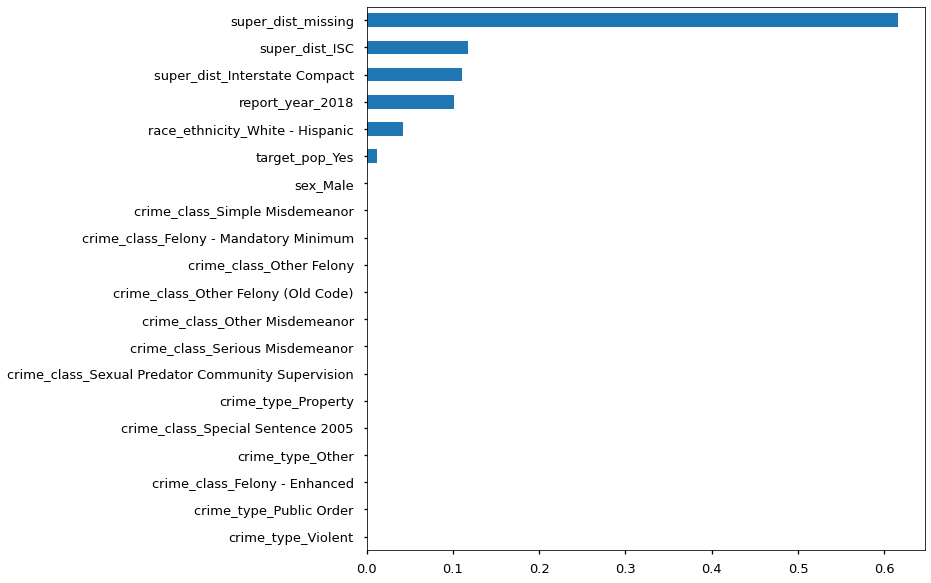

In [44]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

In [45]:
## Get Precitions
y_hat_test = tree.predict(X_test)

# plot_confusion_matrix((y_test,y_hat_test),normalize=True)
# plot_auc_roc_curve(y_test,y_hat_test)

In [46]:
# import sys,os
# folder = '../'
# sys.path.append(folder+'py_files/')

# import classification as cl
# fs.ihelp(cl.evaluate_classification)

In [47]:
len(X_test.columns),len(X_train.columns)

(82, 82)

              precision    recall  f1-score   support

           0       0.80      0.46      0.59      4334
           1       0.42      0.77      0.54      2163

    accuracy                           0.57      6497
   macro avg       0.61      0.62      0.56      6497
weighted avg       0.67      0.57      0.57      6497



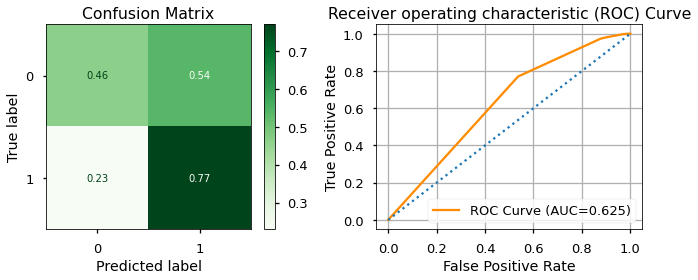

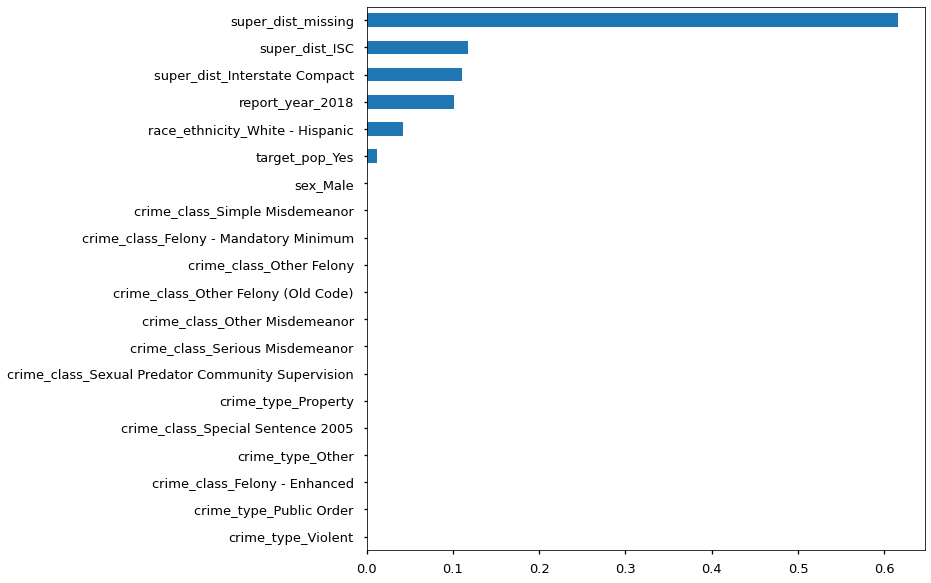

In [48]:
## Evaluate the model
evaluate_model(y_test,y_hat_test,X_test,tree)

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

In [49]:
export_graphviz_kws={}#{'out_file':'tree.png'}

from sklearn.tree import export_graphviz
from IPython.display import SVG
import graphviz #import Source
from IPython.display import display
class_names=['Non_Recid','Yes_Recid']
# if feature_names is None:
feature_names=X_train.columns

tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
tree_viz_kws.update(export_graphviz_kws)

tree_data = export_graphviz(tree,feature_names=feature_names, 
                               class_names=class_names,**tree_viz_kws)
# tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
graph = graphviz.Source(tree_data,format='png')
graph.render("tree.png")
# display(graph)
# display(SVG(graph.pipe(format='svg')))

'tree.png.png'

In [50]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],format_='png',
                   kws={},save_filename=None):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    display(graph)
    if save_filename is not None:
        graph.render(save_filename)

#     display(SVG(graph.pipe(format=format_)))#'svg')))

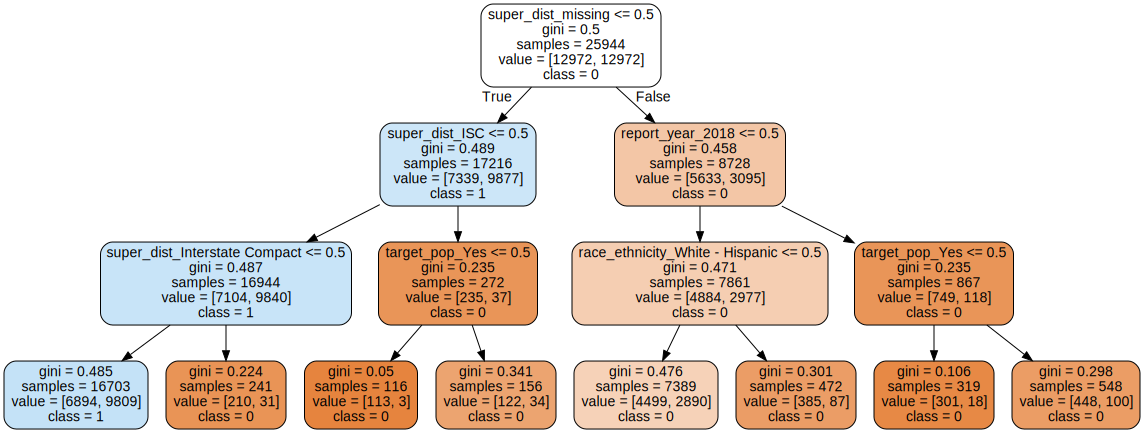

In [51]:
visualize_tree(tree,X.columns,save_filename='testing',format_='svg')#,export_graphviz_kws={'out_file':'tree.png'})

## GridSearchCV with DecisionTreeClassifier

In [52]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [53]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
## Set up param grid
grid = {'max_depth': [3,5,10,15],
     'criterion': ['gini','entropy'],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,3,5,10],
       'max_features': [3,5,10,30,77]}#10,20,50,len(X.columns)]}


## Instantiate classifier
dt_clf = DecisionTreeClassifier()


## Instantiate GridSearchCV
gridsearch = GridSearchCV(dt_clf, param_grid=grid,cv=5)

## Start timer and fit search
timer = Timer()

tree_cv = gridsearch.fit(X_train, y_train)
timer.stop()
## Stop time and print best params
print(tree_cv.best_params_)

[i] Timer started at 04/09/20 - 17:53:52
[i] Timer stopped at 04/09/20 - 17:55:36
  - Total Time: 0:01:44.396369
{'criterion': 'gini', 'max_depth': 15, 'max_features': 77, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [54]:
## Create a tree with the gridsearch's best params
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_train,y_train)

## Get predictions for train and test
y_hat_test = tree.predict(X_test)
y_hat_train = tree.predict(X_train)


## Print classification report for train and test
print(f"[i] Training Data:\n{metrics.classification_report(y_train,y_hat_train)}",end='\n\n')
print(f"[i] Test Data:\n{metrics.classification_report(y_test,y_hat_test)}")
# print(metrics.confusion_matrix(y_test,y_hat_test))

## Evaluate Model using function

[i] Training Data:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     12972
           1       0.69      0.79      0.73     12972

    accuracy                           0.72     25944
   macro avg       0.72      0.72      0.71     25944
weighted avg       0.72      0.72      0.71     25944


[i] Test Data:
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      4334
           1       0.43      0.63      0.51      2163

    accuracy                           0.60      6497
   macro avg       0.59      0.61      0.59      6497
weighted avg       0.65      0.60      0.61      6497



              precision    recall  f1-score   support

           0       0.76      0.59      0.66      4334
           1       0.43      0.63      0.51      2163

    accuracy                           0.60      6497
   macro avg       0.59      0.61      0.59      6497
weighted avg       0.65      0.60      0.61      6497



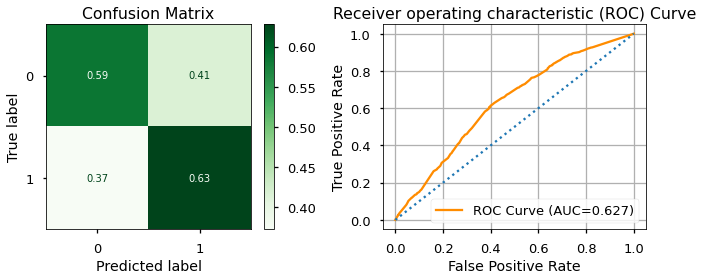

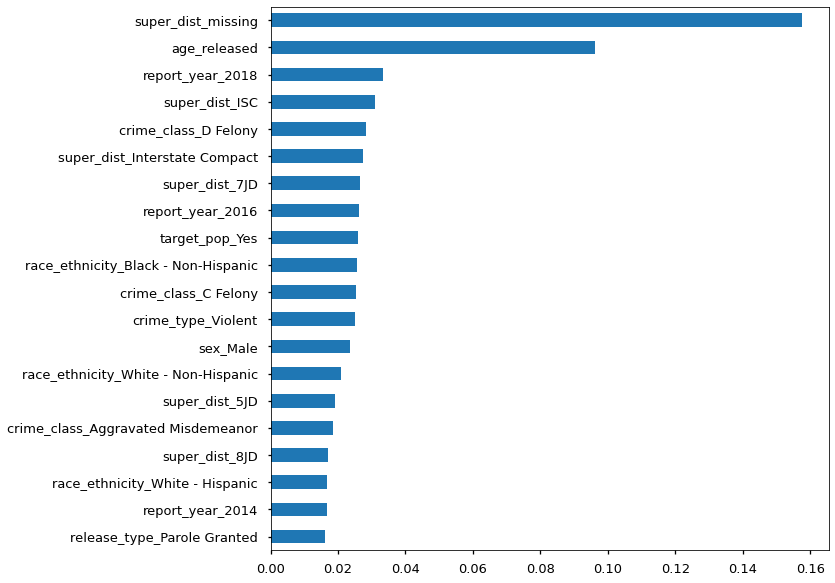

In [56]:
# visualize_tree(tree)
evaluate_model(y_test,y_hat_test,X_test,tree)

In [ ]:
vis

In [ ]:
# # Create the pipeline
# pipetree = Pipeline([('enc',LabelEncoder()),
#                      ('ohe',OneHotEncoder()),
#                     ('dt',DecisionTreeClassifier())])

# # pipe = Pipeline([('scl', MinMaxScaler()),
# #                 ('pca', PCA(n_components=10)),
# #                 ('svm', svm.SVC(random_state=123))])

# # Create the grid parameter
# grid = {'dt__max_depth': [3,5,10],
#      'dt__criterion': ['gini','entropy'],
#      'dt__min_samples_split':[2,5,10],
#      'dt__min_samples_leaf':[1,2,3]}
# @timeit
# def timed_search(pipe=pipetree, grid=grid):
#     randomsearch = RandomizedSearchCV(estimator=pipe,param_distributions=grid,verbose=1)

#     randomsearch.fit(X_train, y_train)
#     return randomsearch
# # # Create the grid parameter
# # grid = [{'svm__kernel': ['poly', 'sigmoid'],
# #          'svm__C': [0.01, 1, 100],
# #          'svm__degree0': [2,3,4,5],
# #          'svm__gamma': [0.001, 0.01]}]

# # # Create the grid, with "pipe" as the estimator
# # gridsearch = GridSearchCV(estimator=pipe,
# #                   param_grid=grid,
# #                   scoring='accuracy',
# #                   cv=3)

# # Fit using grid search
# # gridsearch.fit(X_train, y_train)

## Hyper Parameter Tuning with Trees
## TO DO: 
https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-29-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees


### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

## SEE LABS FROM CLASS FOLDER FOR HYPERPARAMETER TUNING NOTEBOOK

# Questions / Comments